# **Introduction**
---

**Object detection** refers to the **task of locating and classifying objects** within an **image or video**. In the context of **car object detection**, the problem involves **identifying and localizing all instances of cars within an image or video frame**.

The problem of **object detection** can be broken down into **two main sub-tasks**:

* **Object localization**: This involves identifying the **location** of **all objects** within the **image or video frame**. Typically, **object localization** is done by **drawing bounding boxes** around the **objects of interest**.

* **Object classification**: Once the objects have been localized, the next step is to **classify them into different categories**. In the case of **object detection**, this **involves distinguishing between different objects in the scene**.

Both of these **sub-tasks can be challenging**, especially in **real-world scenarios** where the **images or videos may contain cluttered backgrounds**, **occlusions**, and **variations in lighting** and **camera angles**. To address **these challenges**, various **computer vision techniques** have been developed, including **deep learning-based approaches** such as **YOLO, Faster R-CNN, and Mask R-CNN**, which are capable of **achieving high levels of accuracy and efficiency in object detection tasks**.

**Notebook Structure**
---

This notebook is divided into four main sections, each with a specific focus:

* **SetUp**: This section is dedicated to importing all the necessary modules required for the notebook to function. Additionally, we set some constants, which are used throughout the notebook for data loading.

* **Data Loading**: In this section, we load the data in the form of Numpy arrays.

* **Data Visualization**: Here, we create a plot that allows us to visualize the images present in the data along with their respective bounding boxes. This is an essential step in understanding the data and verifying that the data has been properly loaded.

* **YOLO**: In this section, we focus on the model - YOLOv3. We develop multiple functions that are used to make predictions on the data. These functions include filtering the predictions based on probability, applying non-max suppression, and finally, creating a function that brings everything together. The final function combines all the previously developed functions and provides the predicted bounding boxes, class probabilities, and labels for each image in the data. This section is the crux of the notebook and helps us to understand how YOLOv3 works in object detection.

# **YOLOv3 - You Only Look Once**
---
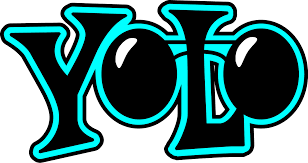

**YOLO (You Only Look Once)** is a **popular object detection algorithm** that can **recognize objects** in **images and videos in real-time**. **YOLOv3 is the latest version** of this **algorithm** and has **significantly improved the detection accuracy compared to its earlier versions**.

The **main idea** behind **YOLO** is to **divide the input image** into a **grid of cells** and for each cell, the **algorithm predicts** a set of **bounding boxes**, **confidence scores**, and **class probabilities**. The **predicted bounding boxes** are parameterized relative to the **corresponding cell**, and they **predict the center coordinates**, **width, and height of the object**. The **confidence score** indicates how **confident the algorithm** is that there is an **object in that box**, and the **class probabilities predict** the **probability of the object belonging to each class**.

**YOLOv3** introduces a **number of improvements** over its predecessor, including:

* **Feature Pyramid Network (FPN)**: YOLOv3 uses an FPN to extract features at different scales, allowing it to detect objects of different sizes.

* **Darknet-53 Backbone**: YOLOv3 uses a deep neural network architecture called Darknet-53 as its backbone. Darknet-53 is a powerful convolutional neural network that can extract features from images at different levels of abstraction.

* **Spatially-Separable Convolutional Layers**: YOLOv3 uses a new type of convolutional layer called spatially-separable convolutional layers. These layers are more computationally efficient and allow YOLOv3 to run faster on GPUs.

The architecture of YOLOv3 is as follows:
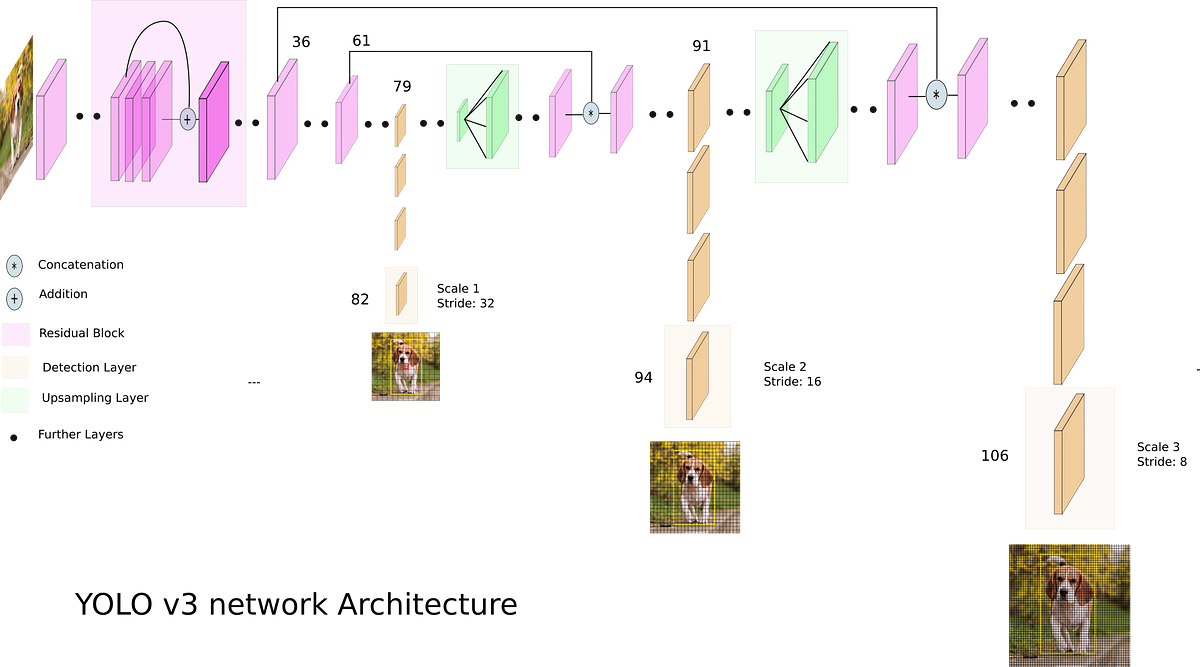

**YOLOv3** has 3 output layers which is uses to detect objects of small, medium or large size.

Overall, **YOLOv3 is a fast** and **accurate object detection algorithm** that can be used for a **wide range of applications, from surveillance to autonomous driving**.

The **most easiest and convenient way** to use **Yolo is through OpenCV**.

# 🧭 Testing YOLO v3 - Objects Detection Algorithm
* Using **'dnn'** OpenCV library for loading model of Neural Network from configuration file.

* Using weights trained on COCO dataset of 80 classes.


# 📥 Importing needed libraries

In [ ]:
# Importing necessary libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/yolov3_416

/content/drive/MyDrive/Colab Notebooks/yolov3_416


# 📂 Loading COCO class labels from file

In [ ]:
# Opening file, reading, eliminating whitespaces, and splitting by '\n', which in turn creates list
labels = open('coco.names').read().strip().split('\n')  # list of names

# # Check point
print(labels)


['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [ ]:
# Defining paths to the weights and configuration file with model of Neural Network
weights_path = '/content/drive/MyDrive/Colab Notebooks/yolov3_416/yolov3.weights'
configuration_path = '/content/drive/MyDrive/Colab Notebooks/yolov3_416/yolo3_416.cfg'

# Setting minimum probability to eliminate weak predictions
probability_minimum = 0.5

# Setting threshold for non maximum suppression
threshold = 0.3


# 🗂️ Loading trained YOLO Objects Detector with the help of 'dnn' library from OpenCV

In [ ]:
network = cv2.dnn.readNet(configuration_path, weights_path)

# Getting names of all layers
layers_names_all = network.getLayerNames()  # list of layers' names

# # Check point
print(layers_names_all)


('conv_0', 'bn_0', 'leaky_1', 'conv_1', 'bn_1', 'leaky_2', 'conv_2', 'bn_2', 'leaky_3', 'conv_3', 'bn_3', 'leaky_4', 'shortcut_4', 'conv_5', 'bn_5', 'leaky_6', 'conv_6', 'bn_6', 'leaky_7', 'conv_7', 'bn_7', 'leaky_8', 'shortcut_8', 'conv_9', 'bn_9', 'leaky_10', 'conv_10', 'bn_10', 'leaky_11', 'shortcut_11', 'conv_12', 'bn_12', 'leaky_13', 'conv_13', 'bn_13', 'leaky_14', 'conv_14', 'bn_14', 'leaky_15', 'shortcut_15', 'conv_16', 'bn_16', 'leaky_17', 'conv_17', 'bn_17', 'leaky_18', 'shortcut_18', 'conv_19', 'bn_19', 'leaky_20', 'conv_20', 'bn_20', 'leaky_21', 'shortcut_21', 'conv_22', 'bn_22', 'leaky_23', 'conv_23', 'bn_23', 'leaky_24', 'shortcut_24', 'conv_25', 'bn_25', 'leaky_26', 'conv_26', 'bn_26', 'leaky_27', 'shortcut_27', 'conv_28', 'bn_28', 'leaky_29', 'conv_29', 'bn_29', 'leaky_30', 'shortcut_30', 'conv_31', 'bn_31', 'leaky_32', 'conv_32', 'bn_32', 'leaky_33', 'shortcut_33', 'conv_34', 'bn_34', 'leaky_35', 'conv_35', 'bn_35', 'leaky_36', 'shortcut_36', 'conv_37', 'bn_37', 'leaky_

In [ ]:
# Getting only output layers' names that we need from YOLO algorithm
output_layers_names = network.getUnconnectedOutLayersNames()
output_layers_names  # list of layers' names


('yolo_82', 'yolo_94', 'yolo_106')

# 🗀 Loading input image from file

In [ ]:
# Our image initially is in RGB format
# But now we open it in BGR format as function 'cv2.imread' opens it so
image_input = cv2.imread("/content/drive/MyDrive/Colab Notebooks/yolov3_416/JPEGImages/000002.jpg")

# Getting image shape
image_input_shape = image_input.shape

# Check point
print(image_input_shape)  # tuple of (917, 1222, 3)


(500, 335, 3)


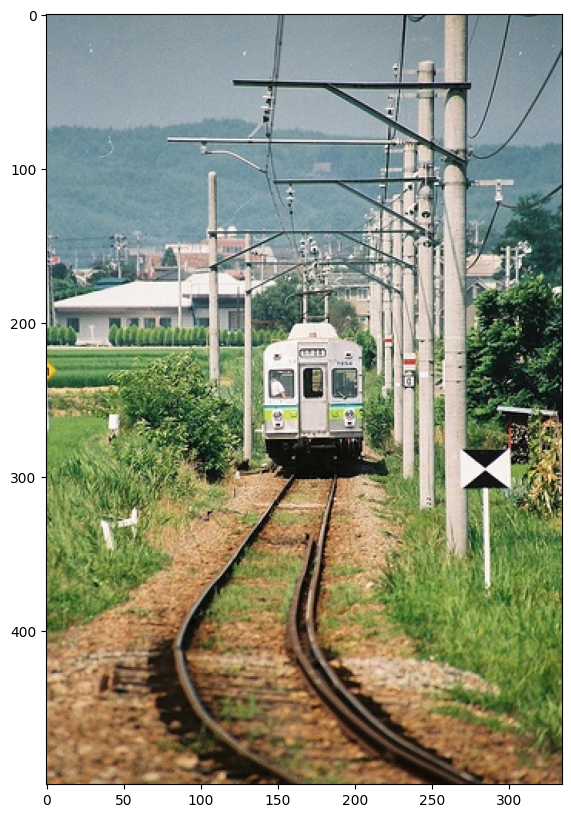

In [ ]:
# Showing RGB image but firstly converting it from BGR format
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.imshow(cv2.cvtColor(image_input, cv2.COLOR_BGR2RGB))
plt.show()


# 💡 Getting blob from input image

**OpenCV's** **deep neural network (dnn)** module expects the **input image** to be in a **specific format** called a **"blob"**. A **blob** is a **4D numpy array** **(batch_size, channels, height, width)** that contains the **input image** after **some pre-processing**. The blob can be fed directly into the **deep neural network** for **inference**. So let's create a function that will **convert the images into blobs**.

In [ ]:
# The 'cv2.dnn.blobFromImage' function returns 4-dimensional blob
# from input image after mean subtraction, normalizing, and RB channels swapping
# Resulted shape has number of images, number of channels, width and height
# E.G.: blob = cv2.dnn.blobFromImage(image, scalefactor=1.0, size, mean, swapRB=True)
# Link: https://www.pyimagesearch.com/2017/11/06/deep-learning-opencvs-blobfromimage-works/
blob = cv2.dnn.blobFromImage(image_input, 1 / 255.0, (416, 416), swapRB=True, crop=False)

# Check point
print(image_input.shape)  # (917, 1222, 3)
print(blob.shape)  # (1, 3, 416, 416)


(500, 335, 3)
(1, 3, 416, 416)


A **blob** is a **multi-dimensional array** that contains the **image pixel values** and is processed by **deep learning models**.

The `cv.dnn.blobFromImage()` function takes the following parameters:

* **image**: The input image to be transformed into a blob.
* **scalefactor**: The scale factor used to divide the image pixel values. A value of 1/255 is commonly used.
* **size**: The size of the output image blob. YOLOv3 model takes 416x416 size as input.
* **mean**: The mean value subtracted from each channel of the image. In this case, (0,0,0) is used as there is no need to subtract any values.
* **swapRB**: A boolean flag indicating whether to swap the Red and Blue channels. YOLOv3 requires input images to be in BGR format.
* **crop**: A boolean flag indicating whether to crop the image or not. In this case, it is set to False.

The **resulting blob** is then used as **input to the YOLOv3 model for object detection**.

(416, 416, 3)


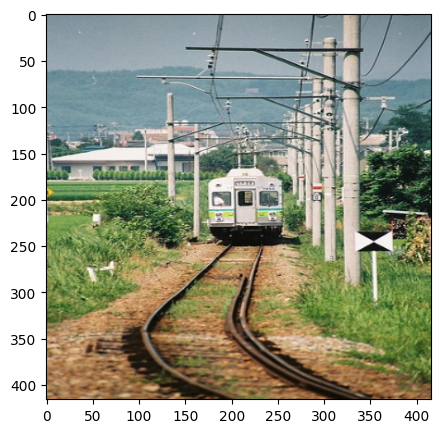

In [ ]:
# Check point
# Slicing blob and transposing to make channels come at the end
blob_to_show = blob[0, :, :, :].transpose(1, 2, 0)
print(blob_to_show.shape)  # (416, 416, 3)

# Showing 'blob_to_show'
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 5.0)
plt.imshow(blob_to_show)
plt.show()

# ➰ Implementing forward pass with our blob and only through output layers

In [ ]:
# Calculating at the same time, needed time for forward pass
network.setInput(blob)  # setting blob as input to the network
start = time.time()
output_from_network = network.forward(output_layers_names)
end = time.time()

# Showing spent time for forward pass
print('YOLO v3 took {:.5f} seconds'.format(end - start))


YOLO v3 took 0.79957 seconds


In [ ]:
# Check point
print(type(output_from_network))  # <class 'list'>
print(type(output_from_network[0]))  # <class 'numpy.ndarray'>

<class 'tuple'>
<class 'numpy.ndarray'>


# 🌈 Colours for representing every detected object

Let's set up a **random seed**, setting up a **random seed** is essential in a **machine learning project** for the following reasons:

* **Reproducibility**: Setting up a random seed ensures that the results obtained from the model are reproducible. When a random seed is set, the same random numbers are generated each time the model is run. This means that the same results can be obtained every time the code is executed, which is critical for debugging, testing, and reproducing results.

* **Consistency**: Setting up a random seed ensures that the same set of samples are selected for training and testing the model every time it is run. This consistency in the data selection process allows us to compare the performance of different models with the same data.

* **Fairness**: In some cases, the random initialization of model parameters can lead to different results due to variations in the random seed. This can be particularly important in fairness-sensitive applications, such as when the model is used to make decisions that impact people's lives. By setting a random seed, we can reduce the impact of random variation on the model's performance and ensure that the model is fair to all groups.

In [ ]:
# Seed the generator - every time we run the code it will generate by the same rules
# In this way we can keep specific colour the same for every class
np.random.seed(42)
# randint(low, high=None, size=None, dtype='l')
colours = np.random.randint(0, 255, size=(len(labels), 3), dtype='uint8')

# Check point
print(colours.shape)  # (80, 3)
print(colours[0])  # [102 220 225]

(80, 3)
[102 220 225]


The **number** **42** is **commonly used** as a **random seed** in the **machine learning community** for **historical and cultural reasons**. In the book ***The Hitchhiker's Guide to the Galaxy*** by *Douglas Adams*, the number **42** is famously referred to as the ***Answer to the Ultimate Question of Life, the Universe, and Everything.*** This has led to the **number 42** being adopted as a **sort of inside joke** or **cultural reference** in the **programming community**.

In [ ]:
# Preparing lists for detected bounding boxes, obtained confidences and class's number
bounding_boxes = []
confidences = []
class_numbers = []

In [ ]:
# Getting spacial dimension of input image
h, w = image_input_shape[:2]  # Slicing from tuple only first two elements

# Check point
print(h, w)  # 917 1222

500 335


# ➿ Going through all output layers after feed forward and answer from network

In **YOLO**, the **bounding box coordinates** are **normalized values** that range from **0 to 1** relative to the **size of the input image**. However, we need to convert these **normalized coordinates** to the **coordinates on the original image** to **draw the bounding box**. Therefore, **we multiply the normalized coordinates** by the **width and height** of the **original image** to get **the actual pixel values.**

For example, if the **normalized bounding box coordinates** are **[0.1, 0.2, 0.3, 0.4]** and the **original image size is (800, 600),** then the **actual bounding box** coordinates will be **[80, 120, 240, 240]**. We get these values by **multiplying [0.1, 0.2, 0.3, 0.4] with [800, 600, 800, 600], respectively**.

In [ ]:
for result in output_from_network:
    # Going through all detections from current output layer
    for detection in result:
        # Getting class for current object
        scores = detection[5:]
        class_current = np.argmax(scores)

        # Getting confidence (probability) for current object
        confidence_current = scores[class_current]

        # Eliminating weak predictions by minimum probability
        if confidence_current > probability_minimum:
            # Scaling bounding box coordinates to the initial image size
            # YOLO data format keeps center of detected box and its width and height
            # That is why we can just elementwise multiply them to the width and height of the image
            box_current = detection[0:4] * np.array([w, h, w, h])

            # From current box with YOLO format getting top left corner coordinates
            # that are x_min and y_min
            x_center, y_center, box_width, box_height = box_current.astype('int')
            x_min = int(x_center - (box_width / 2))
            y_min = int(y_center - (box_height / 2))

            # Adding results into prepared lists
            bounding_boxes.append([x_min, y_min, int(box_width), int(box_height)])
            confidences.append(float(confidence_current))
            class_numbers.append(class_current)

# 🔂 Implementing non maximum suppression of given boxes and corresponding scores

After applying the **YOLO model** on the **input images**, it **generates a large number of bounding boxes** for **each image** with their respective **confidence scores**. However, many of **these bounding boxes** may **overlap and represent the same object**. To filter out these **redundant boxes**, we need to **perform non-maximum suppression (NMS)**. **NMS** is a **process that removes overlapping boxes based on their Intersection over Union (IoU) score**.

After **applying probability-based filtration** on the **predicted bounding boxes**, we can use **OpenCV's dnn.NMSBoxes()** function to **perform NMS** on the **remaining boxes**. However, this **function only applies NMS to one output at a time**. Therefore, we need to create a **custom function** that can **apply NMS to multiple outputs generated by the YOLO model.**

In [ ]:
# It is needed to make sure the data type of the boxes is 'int'
# and the type of the confidences is 'float'
# https://github.com/opencv/opencv/issues/12789
results = cv2.dnn.NMSBoxes(bounding_boxes, confidences, probability_minimum, threshold)

# Check point
# Showing labels of the detected objects
for i in range(len(class_numbers)):
    print(labels[int(class_numbers[i])])

# Saving found labels
with open('found_labels.txt', 'w') as f:
    for i in range(len(class_numbers)):
        f.write(labels[int(class_numbers[i])])


train
train
train


# 🖽 Drawing bounding boxes and labels

In [ ]:
# Checking if there is at least one detected object
if len(results) > 0:
    # Going through indexes of results
    for i in results.flatten():
        # Getting current bounding box coordinates
        x_min, y_min = bounding_boxes[i][0], bounding_boxes[i][1]
        box_width, box_height = bounding_boxes[i][2], bounding_boxes[i][3]

        # Preparing colour for current bounding box
        colour_box_current = [int(j) for j in colours[class_numbers[i]]]

        # Drawing bounding box on the original image
        cv2.rectangle(image_input, (x_min, y_min), (x_min + box_width, y_min + box_height),
                      colour_box_current, 2)

        # Preparing text with label and confidence for current bounding box
        text_box_current = '{}: {:.4f}'.format(labels[int(class_numbers[i])], confidences[i])

        # Putting text with label and confidence on the original image
        cv2.putText(image_input, text_box_current, (x_min, y_min - 7), cv2.FONT_HERSHEY_SIMPLEX,
                    0.5, colour_box_current, 2)

# 🖼️ Showing RGB image with bounding boxes and labels

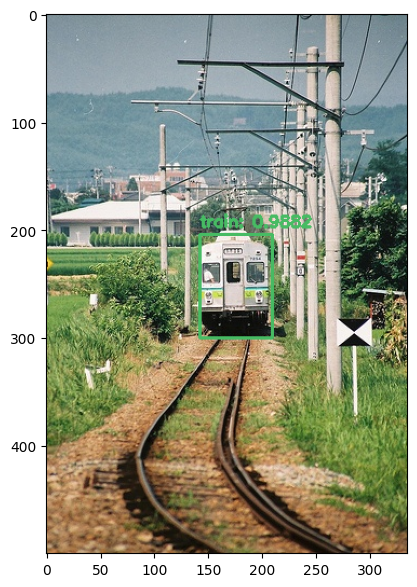

In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 7.0)
plt.imshow(cv2.cvtColor(image_input, cv2.COLOR_BGR2RGB))
plt.show()


In [ ]:
def detect_objects(image):
  blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416), swapRB=True, crop=False)
  network.setInput(blob)  # setting blob as input to the network
  output_from_network = network.forward(output_layers_names)
  # Seed the generator - every time we run the code it will generate by the same rules
  # In this way we can keep specific colour the same for every class
  np.random.seed(42)
  # randint(low, high=None, size=None, dtype='l')
  colours = np.random.randint(0, 255, size=(len(labels), 3), dtype='uint8')
  bounding_boxes = []
  confidences = []
  class_numbers = []
  h, w = image.shape[:2]  # Slicing from tuple only first two elements
  for result in output_from_network:
    # Going through all detections from current output layer
    for detection in result:
        # Getting class for current object
        scores = detection[5:]
        class_current = np.argmax(scores)

        # Getting confidence (probability) for current object
        confidence_current = scores[class_current]

        # Eliminating weak predictions by minimum probability
        if confidence_current > probability_minimum:
            # Scaling bounding box coordinates to the initial image size
            # YOLO data format keeps center of detected box and its width and height
            # That is why we can just elementwise multiply them to the width and height of the image
            box_current = detection[0:4] * np.array([w, h, w, h])

            # From current box with YOLO format getting top left corner coordinates
            # that are x_min and y_min
            x_center, y_center, box_width, box_height = box_current.astype('int')
            x_min = int(x_center - (box_width / 2))
            y_min = int(y_center - (box_height / 2))

            # Adding results into prepared lists
            bounding_boxes.append([x_min, y_min, int(box_width), int(box_height)])
            confidences.append(float(confidence_current))
            class_numbers.append(class_current)
  return [bounding_boxes,confidences,class_numbers]

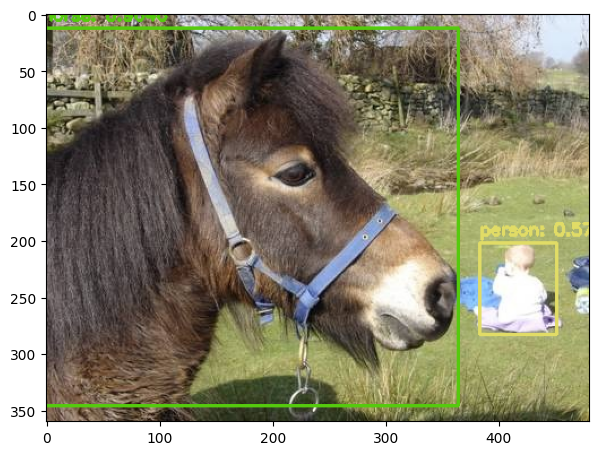

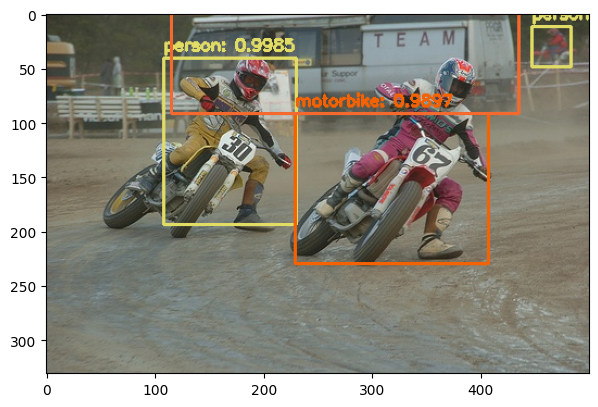

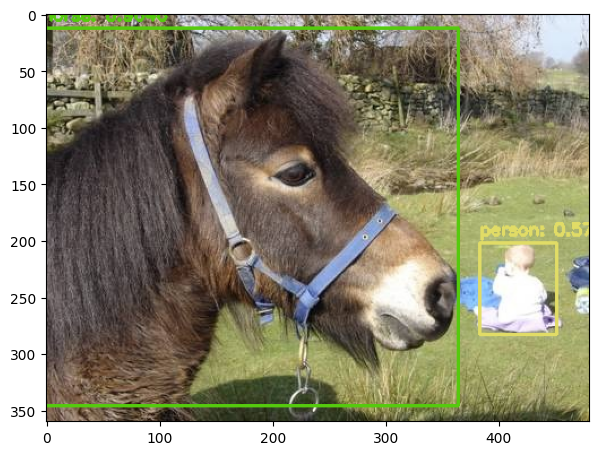

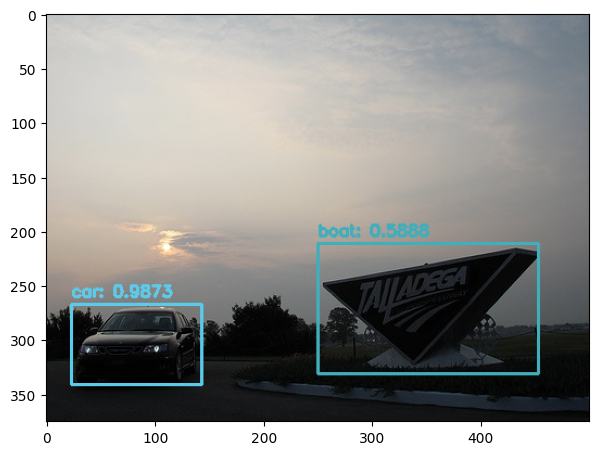

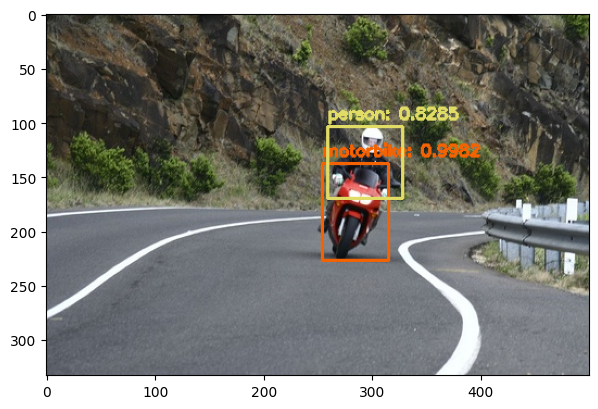

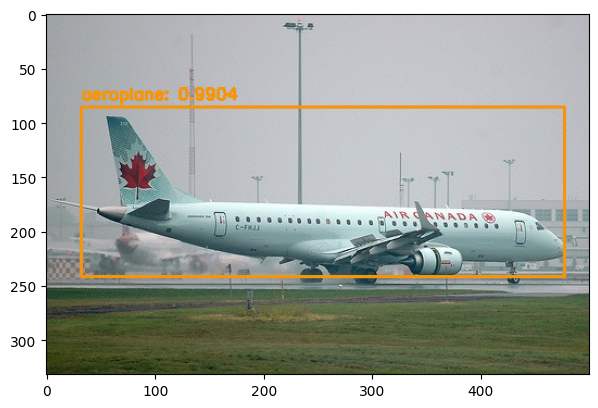

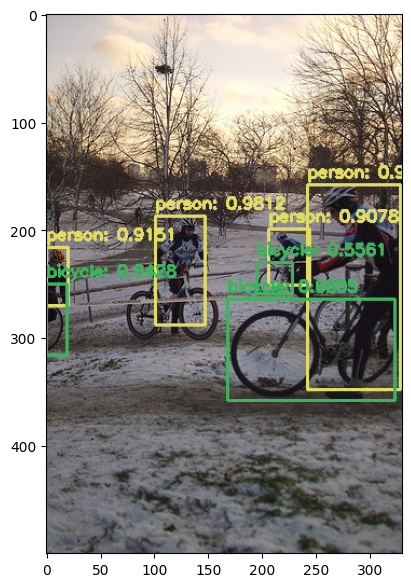

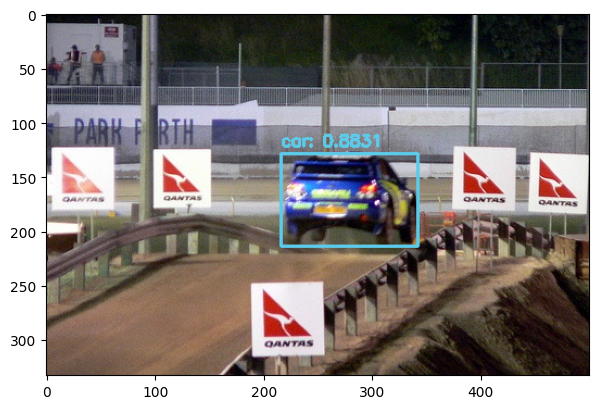

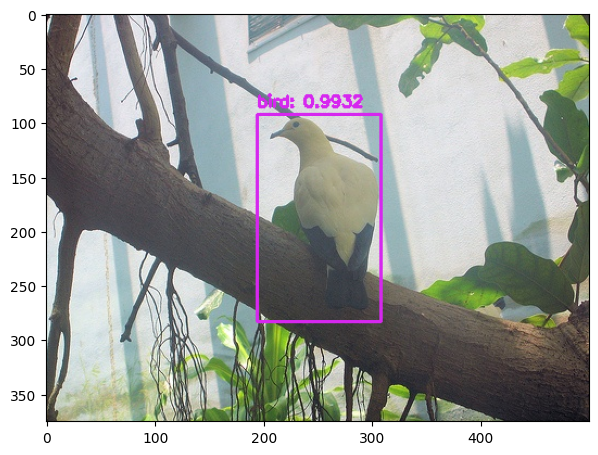

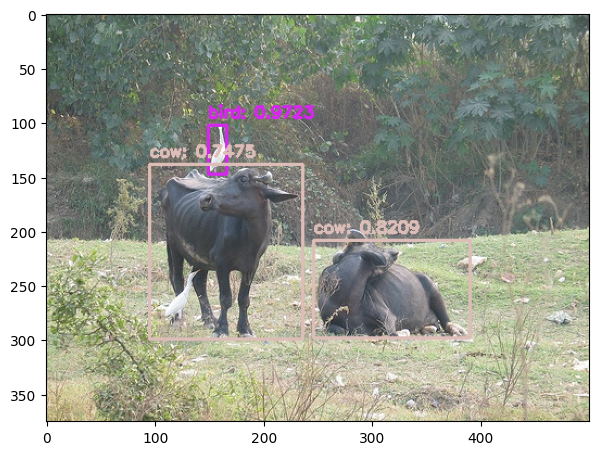

In [ ]:
import os
test_dir = "/content/drive/MyDrive/Colab Notebooks/yolov3_416/JPEGImages"
c=0
for image_file in os.listdir(test_dir):
    c=c+1
    if c==11:
      break
    # Load image
    img_path = os.path.join(test_dir, image_file)
    image = cv2.imread(img_path)

    # Detect objects in the image
    [bounding_boxes,confidences,class_numbers] = detect_objects(image)
    results = cv2.dnn.NMSBoxes(bounding_boxes, confidences, probability_minimum, threshold)

    # Check point
    # Showing labels of the detected objects
    #for i in range(len(class_numbers)):
    #    print(labels[int(class_numbers[i])])

    # Saving found labels
    with open('found_labels.txt', 'w') as f:
        for i in range(len(class_numbers)):
            f.write(labels[int(class_numbers[i])])
    if len(results) > 0:
    # Going through indexes of results
      for i in results.flatten():
        # Getting current bounding box coordinates
        x_min, y_min = bounding_boxes[i][0], bounding_boxes[i][1]
        box_width, box_height = bounding_boxes[i][2], bounding_boxes[i][3]

        # Preparing colour for current bounding box
        colour_box_current = [int(j) for j in colours[class_numbers[i]]]

        # Drawing bounding box on the original image
        cv2.rectangle(image, (x_min, y_min), (x_min + box_width, y_min + box_height),
                      colour_box_current, 2)

        # Preparing text with label and confidence for current bounding box
        text_box_current = '{}: {:.4f}'.format(labels[int(class_numbers[i])], round(confidences[i],2))

        # Putting text with label and confidence on the original image
        cv2.putText(image, text_box_current, (x_min, y_min - 7), cv2.FONT_HERSHEY_SIMPLEX,
                    0.5, colour_box_current, 2)
    %matplotlib inline
    plt.rcParams['figure.figsize'] = (8.0, 8.0)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()